# spaceNNtime in simulated experiments

In this notebook I run spaceNNtime in a example as a demonstration and later analise other experiments

<a name="Home4"></a>

## Contents

0. [ Library and packages ](#Lib)
1. [ Functions ](#Fun)
    + 1. [Python Functions](#Pyf)
    + 2. [R Functions](#Rfu)
2. [ spaceNNtime results in simulations ](#Exp)
    + 1. [Presentation of experiment simulated data](#Prs)
    + 2. [Allele counts per selected individuals](#All)
    + 3. [Coordinates and sampling time per individual](#Coo)
    + 4. [spaceNNtime on the first set of test individuals](#sNt)
    + 5. [Analise results](#Ana)
    + 6. [Summary results](#Sum)
        - **DOWNSAMPLING EXPERIMENT**
        - 1. [Exp001 : 15,000 randomly uniformally distributed samples ](#001)
        - 2. [Exp002 : 10,000 randomly uniformally distributed samples ](#002)
        - 3. [Exp003 :  5,000 randomly uniformally distributed samples ](#003)
        - 4. [Exp004 :  1,500 randomly uniformally distributed samples ](#004)
        - 5. [Exp005 :  1,000 randomly uniformally distributed samples ](#005)
        - 6. [Exp006 :    500 randomly uniformally distributed samples ](#006)
        - 7. [Exp007 :    250 randomly uniformally distributed samples ](#007)
        - **EXPONENTIALLY SAMPLED (similarly to MesoNeo data)**
        - 8. [Exp008 :  1,500 randmoly exponentially distributed samples ](#008)
        - **SNP DENSITY EXPERIMENT**
        - 9. [Exp009 :  1,500 randmoly uniformally distributed samples with 75% SNP density ](#009)
        - 10. [Exp010 :  1,500 randmoly uniformally distributed samples with 50% SNP density ](#0010)
        - 11. [Exp011 :  1,500 randmoly uniformally distributed samples with 25% SNP density ](#011)
        - 12. [Exp012 :  1,500 randmoly uniformally distributed samples with 15% SNP density ](#012)
        - **TRAINING SPACE AND TIME SEPARATELY**
        - 13. [Exp013 :  1,500 randmoly uniformally distributed samples predicting space only ](#011)
        - 14. [Exp014 :  1,500 randmoly uniformally distributed samples predicting time only ](#012)
    + 7. [Summary results all together](#Tog)
        
<a name="011"></a>
#### L. Exp011 :  1,500 randmoly exponentially distributed samples with 25% SNP density
   
<a name="Lib"></a>
## 0. Library and packages

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"


In [4]:
%%R
.libPaths(c("/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"))

library(ggplot2)
library(cowplot)
library(tidyverse)
library(stringr)
library(sf)
library(slendr)
library(rnaturalearth)
library(rnaturalearthdata)

options(dplyr.summarise.inform = FALSE)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Linking to GEOS 3.7.2, GDAL 3.0.4, PROJ 6.3.2; sf_use_s2() is TRUE

R[write to console]: You can setup a pre-configured environment with all of slendr's Python
tree-sequence dependencies (Python modules tskit, pyslim, and msprime)
by running the function setup_env().



In [5]:
%%R

gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

colors = gg_color_hue(6)
col_pop = c("ALL" = "black",
            "AFR" = colors[1], "OOA" = colors[2], "EHG" = colors[3],
            "ANA" = colors[4], "EUR" = colors[5], "YAM" = colors[6])


In [6]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"
[2] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"                                 



[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Fun"></a>
## 1. Functions

<a name="Pfu"></a>
### A. Python Functions

<a name="Rfu"></a>
### B. R Functions


[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Exp"></a>
## 2. spaceNNtime results in simulations

<a name="Prs"></a>
### A. Presentation of experiment simulated data

In the table below, we can check each simulation experiment that has been run, its attributes and running conditions.

In [7]:
%%R

read.csv("../../files/experiments.csv", sep = ";")

      sim exp         nam met   siz  snp   pre    typ cov std  err  los   nfe
1  europe   1        loss   5  1500 1.00  sNNt     gt   0   0 0.00 hdtd  None
2  europe   2        loss   5  1500 1.00  sNNt     gt   0   0 0.00 hdtd  None
3  europe   3        loss   5  1500 1.00  sNNt     gt   0   0 0.00 hdtd  None
4  europe   4        loss   5  1500 1.00  sNNt     gt   0   0 0.00 hdtd  None
5  europe   5   reference   5  1500 1.00  sNNt     gt   0   0 0.00 hdtd  None
6  europe   6        loss   5  1500 1.00  sNNt     gt   0   0 0.00 hdtd  None
7  europe   7        loss   5  1500 1.00  sNNt     gt   0   0 0.00 hdtd  None
8  europe   8        loss   5  1500 1.00  sNNt     gt   0   0 0.00  mse  None
9  europe   9        loss   5  1500 1.00  sNNt     gt   0   0 0.00  mse  None
10 europe  10        loss   5  1500 1.00  sNNt     gt   0   0 0.00  edl  None
11 europe  11        loss   5  1500 1.00  sNNt     gt   0   0 0.00  edl  None
12 europe  12  downsample  12 15000 1.00  sNNt     gt   0   0 0.


[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Ana"></a>
### E. Analise results

For each experiment, there is a `pred.txt` file which contains all necessary information to visualize results:

In [8]:
%%R

read.table("../../sandbox/europe/5/pred.txt", header = T) %>%
    head()

     sim exp       nam typ gro   ind idx  snp      run true_lat  true_lon
1 europe   5 reference  gt   0 41517  44 1344 2.434874 57.59758 35.841407
2 europe   5 reference  gt   0 37861 118 1344 2.434874 47.66662  3.397972
3 europe   5 reference  gt   0  5791 511 1344 2.434874 29.92696 51.237838
4 europe   5 reference  gt   1 10238 212 1344 2.421335 40.47967 57.702800
5 europe   5 reference  gt   1  6002 414 1344 2.421335 32.50583 52.119993
6 europe   5 reference  gt   1 24096 812 1344 2.421335 55.81074 35.135833
  pred_lat pred_lon diff_space true_tim  pred_tim  diff_time
1 58.72136 34.57296   145.4298     5468  6966.426 -1498.4258
2 46.98407 26.22026  1715.6040     9250  8004.033  1245.9673
3 32.49509 48.32453   397.8396    43807 43380.770   426.2305
4 39.49431 58.83889   146.1939    38132 38926.027  -794.0273
5 31.72495 47.24700   467.0333    43543 44260.340  -717.3398
6 45.44235 34.32926  1154.2952    22740 24614.906 -1874.9062


In [9]:
%%R -w 1000 -h 1250

exp = "5"

read.table(paste("../../sandbox/europe/", exp, "/pred.txt", sep = ""), header = T) %>%
    select(-c(diff_time, diff_space)) %>%
    gather("stat", "value", c(true_lat, true_lon, pred_lat, pred_lon, true_tim,  pred_tim)) %>% 
    separate(stat, c("truepred", "stat"), sep = "_") %>%
    left_join(read.table("../../data/europe/metadata.txt", header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>% 
    mutate(truepred = factor(truepred, levels = c("true", "pred"))) -> df
    
df %>%
    head()

     sim exp       nam typ gro   ind idx  snp      run truepred stat    value
1 europe   5 reference  gt   0 41517  44 1344 2.434874     true  lat 57.59758
2 europe   5 reference  gt   0 37861 118 1344 2.434874     true  lat 47.66662
3 europe   5 reference  gt   0  5791 511 1344 2.434874     true  lat 29.92696
4 europe   5 reference  gt   1 10238 212 1344 2.421335     true  lat 40.47967
5 europe   5 reference  gt   1  6002 414 1344 2.421335     true  lat 32.50583
6 europe   5 reference  gt   1 24096 812 1344 2.421335     true  lat 55.81074
  pop
1 YAM
2 ANA
3 OOA
4 OOA
5 OOA
6 ANA


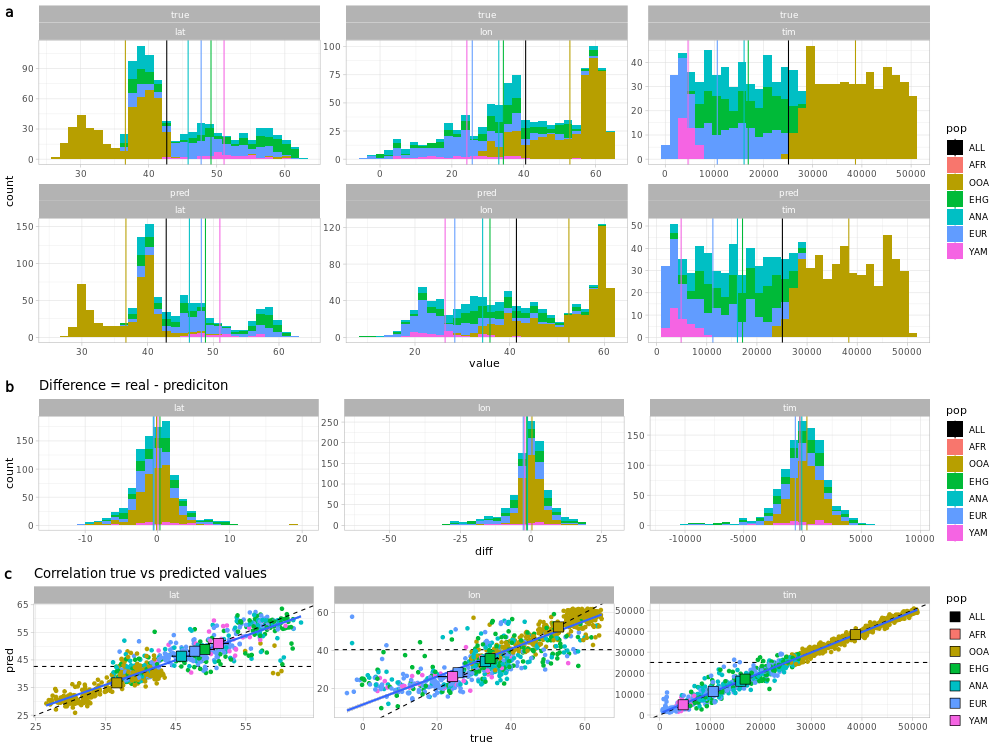

In [10]:
%%R -w 1000 -h 750

plot_grid(
    df %>%        
        ggplot() +
        geom_histogram(aes(x = value, fill = pop), bins = 30) + 
        geom_vline(data = . %>% group_by(pop, stat, truepred) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        geom_vline(data = . %>% group_by(stat, truepred) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        scale_color_manual(values=col_pop) +
        scale_fill_manual(values=col_pop) +
        facet_wrap(truepred~stat, scales = "free") +
        theme_light(),
    df %>%
        spread(truepred, value) %>%
        mutate(diff = true - pred) %>%
        ggplot() +
        geom_histogram(aes(x = diff, fill = pop), bins = 30) + 
        geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(diff)), aes(xintercept = mean, color = pop)) +
        scale_color_manual(values=col_pop) +
        scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light() +
        ggtitle("Difference = real - prediciton"),
    df %>%
        spread(truepred, value) %>%
        ggplot() +
        geom_hline(data = . %>% group_by(stat) %>% summarize(mean = mean(true)), aes(yintercept = mean), linetype = "dashed") +
        geom_point(aes(x = true, y = pred, color = pop)) +
        geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
        geom_smooth(method = "lm", formula = 'y ~ x', aes(x = true, y = pred)) +
        geom_errorbar(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
                                                                     mean_true = mean(true),
                                                                     se_pred   = 1.96*(sd(pred)/sqrt(n())),
                                                                     se_true   = 1.96*(sd(true)/sqrt(n()))), 
                      aes(x = mean_true, ymin = mean_pred-se_pred, ymax = mean_pred+se_pred)) +
        geom_errorbar(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
                                                                     mean_true = mean(true),
                                                                     se_pred   = 1.96*(sd(pred)/sqrt(n())),
                                                                     se_true   = 1.96*(sd(true)/sqrt(n()))), 
                      aes(y = mean_pred, xmin = mean_true-se_true, xmax = mean_true+se_true)) +
        geom_point(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
                                                                  mean_true = mean(true)), 
                   aes(x = mean_true, y = mean_pred, fill = pop), shape = 22, size = 5) +
        scale_color_manual(values=col_pop) +
        scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light() +
        ggtitle("Correlation true vs predicted values"),
    
    ncol = 1, labels = "auto", rel_heights = c(2, 1, 1)
) -> plot

plot

ggsave("true_pred.pdf", width = 20*2, height = 15*1.5, units = "cm")

plot

In [11]:
%%R

df %>% 
    group_by(pop, stat) %>%
    spread(truepred, value) %>%
    summarize(mean_pred = mean(pred), mean_true = mean(true), mean_diff = mean(true-pred), sqrtdiff = mean(sqrt((true-pred)^2))) %>%
    as.data.frame() %>%
    print()

   pop stat   mean_pred   mean_true     mean_diff    sqrtdiff
1  ANA  lat    46.36233    45.79275   -0.56958173    2.890642
2  ANA  lon    34.28199    33.05041   -1.23158074    7.824330
3  ANA  tim 16113.32603 16037.25170  -76.07432517 2024.963776
4  EHG  lat    48.80891    49.15275    0.34383351    3.123245
5  EHG  lon    35.83196    34.32847   -1.50349243    7.675811
6  EHG  tim 17123.10837 16885.14744 -237.96093397 2037.889374
7  EUR  lat    48.17680    47.70475   -0.47205089    2.512245
8  EUR  lon    28.40507    25.66552   -2.73954398    6.790014
9  EUR  tim 11209.24171 10586.07282 -623.16889563 1885.351660
10 OOA  lat    36.70202    36.57758   -0.12443835    1.874941
11 OOA  lon    52.49360    52.83947    0.34586613    2.910610
12 OOA  tim 38328.67691 38690.37716  361.70025000 1067.200849
13 YAM  lat    51.00277    51.07085    0.06807767    3.165231
14 YAM  lon    26.36246    24.16409   -2.19837162    7.617375
15 YAM  tim  4873.59383  4641.00000 -232.59383333 1405.715450


In [7]:
%%R

get_diff_data <- function(exp){
    if(exp == 23){
        read.table(paste("../../sandbox/europe/", exp, "/pred.txt", sep = ""), header = T) %>%
            select(-c(true_lat, true_lon, pred_lat, pred_lon)) %>%
            rename(space = diff_space) %>%
            gather("stat", "value", c(space)) %>% 
            left_join(read.table("../../data/europe/metadata.txt", header = T) %>% select(ind = ind_id, pop), by = c("ind"))
    }else if(exp == 24){
        read.table(paste("../../sandbox/europe/", exp, "/pred.txt", sep = ""), header = T) %>%
            select(-c(true_tim,  pred_tim)) %>%
            rename(time = diff_time) %>%
            gather("stat", "value", c(time)) %>% 
            left_join(read.table("../../data/europe/metadata.txt", header = T) %>% select(ind = ind_id, pop), by = c("ind"))
    }else{
        read.table(paste("../../sandbox/europe/", exp, "/pred.txt", sep = ""), header = T) %>%
            select(-c(true_lat, true_lon, pred_lat, pred_lon, true_tim,  pred_tim)) %>%
            rename(time = diff_time, space = diff_space) %>%
            gather("stat", "value", c(time, space)) %>% 
            left_join(read.table("../../data/europe/metadata.txt", header = T) %>% select(ind = ind_id, pop), by = c("ind"))
    }
}

get_diff_data(5) %>%
    head()

     sim exp       nam typ gro   ind idx  snp      run stat      value pop
1 europe   5 reference  gt   0 41517  44 1344 2.434874 time -1498.4258 YAM
2 europe   5 reference  gt   0 37861 118 1344 2.434874 time  1245.9673 ANA
3 europe   5 reference  gt   0  5791 511 1344 2.434874 time   426.2305 OOA
4 europe   5 reference  gt   1 10238 212 1344 2.421335 time  -794.0273 OOA
5 europe   5 reference  gt   1  6002 414 1344 2.421335 time  -717.3398 OOA
6 europe   5 reference  gt   1 24096 812 1344 2.421335 time -1874.9062 ANA


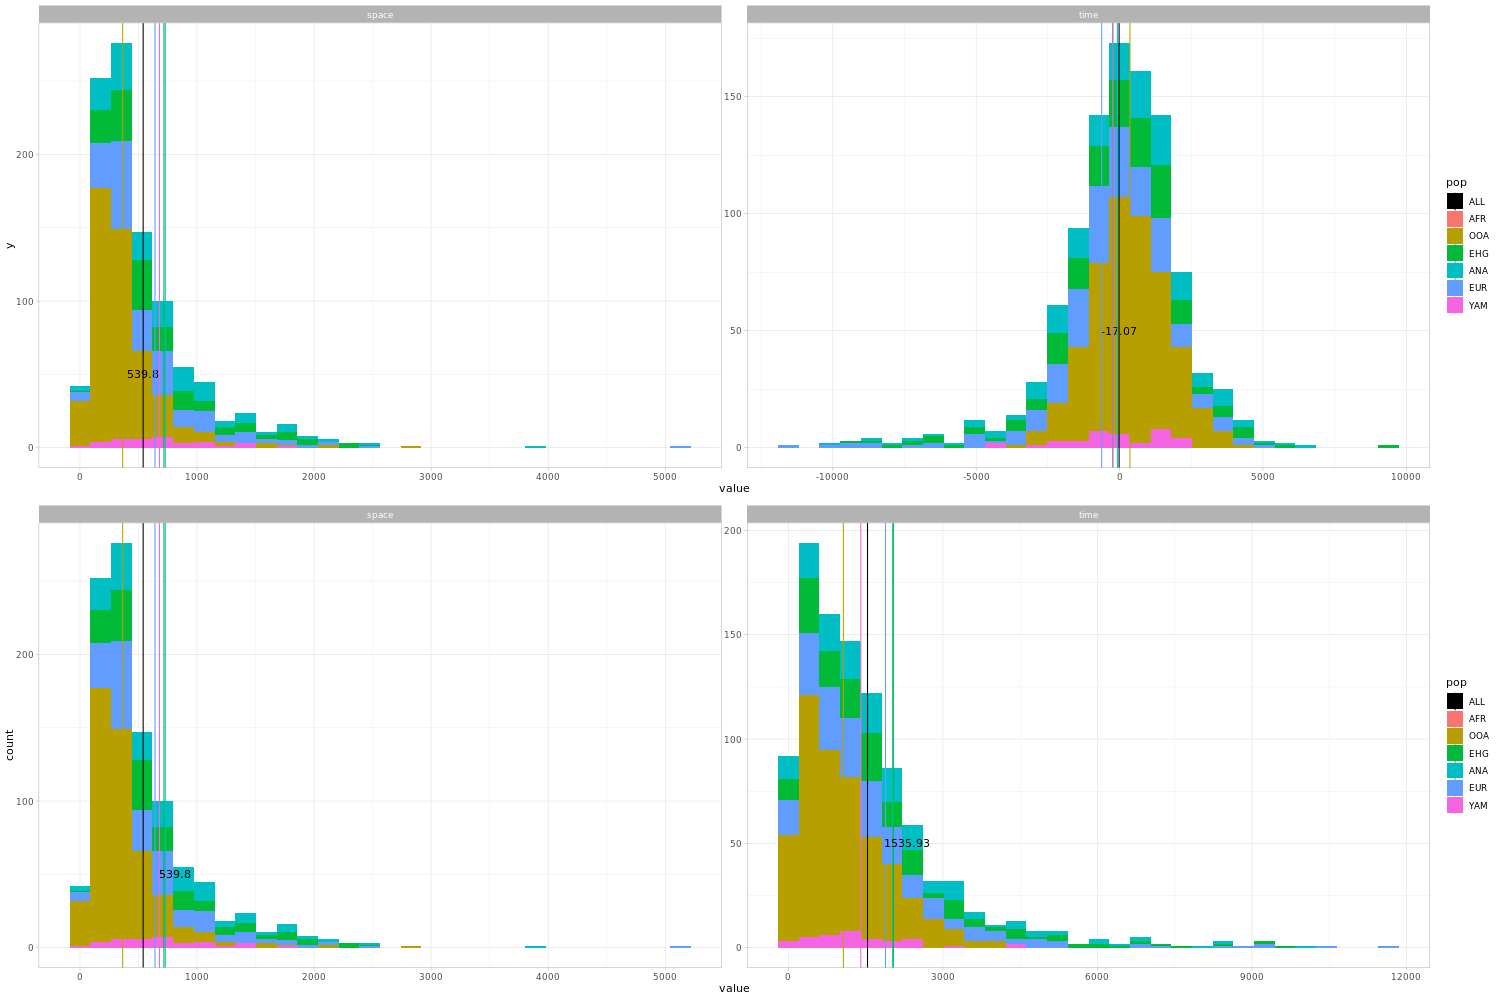

In [13]:
%%R -w 1500 -h 1000

exp = "5"

plot_grid(
    get_diff_data(exp) %>%
        ggplot() +
        geom_histogram(aes(x = value, fill = pop), bins = 30) +
        geom_vline(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        geom_text(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(x = mean, y = 50, label = round(mean, 2))) +
        geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        scale_color_manual(values=col_pop) +
        scale_fill_manual(values=col_pop) +    
        facet_wrap(.~stat, scales = "free") +
        theme_light(),
    
    get_diff_data(exp) %>%
        mutate(value = sqrt(value^2)) %>%
        ggplot() +
        geom_histogram(aes(x = value, fill = pop), bins = 30) +
        geom_vline(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        geom_text(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(x = mean+(mean*0.5), y = 50, label = round(mean, 2))) +
        ylab("count") +
        scale_color_manual(values=col_pop) +
        scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light(),
    
    nrow = 2) -> plot

plot

ggsave("diff.pdf", width = 20*1.5, height = 15*1.5, units = "cm")

plot

In [8]:
%%R

error_spaceNNtime_all_scenarios_per_pop <- function(){
    read.csv("../../files/experiments.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
    #for(i in c(4, 34, 35, 36, 37, 38, 39, 40)){
        print(i)
        sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        all_scenarios = rbind(all_scenarios, 
                              get_diff_data(exp) %>%
                                  mutate(value = abs(value)) %>%
                                  group_by(sim, exp, nam, typ, stat, pop) %>%
                                  summarize(mean = mean(value),
                                            se   = sd(value)/sqrt(n())) %>%
                                  mutate(exp = factor(exp))
                             )
            
    }
    all_scenarios
}

all_scenarios_per_pop <- error_spaceNNtime_all_scenarios_per_pop()
head(all_scenarios_per_pop)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
# A tibble: 6 × 8
# Groups:   sim, exp, nam, typ, stat [2]
  sim    exp   nam   typ   stat  pop    mean    se
  <chr>  <fct> <chr> <chr> <chr> <chr> <dbl> <dbl>
1 europe 1     loss  gt    space ANA   2925.  95.8
2 europe 1     loss  gt    space EHG   3151.  86.9
3 europe 1     loss  gt    space EUR   3613.  76.6
4 europe 1     loss  gt    space OOA   1876.  54.5
5 europe 1     loss  gt    space YAM   4618.  88.3
6 europe 1     loss  gt    time  ANA   1927. 133. 


In [9]:
%%R

error_spaceNNtime_all_scenarios_all <- function(){
    read.csv("../../files/experiments.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
    #for(i in c(4, 34, 35, 36, 37, 38, 39, 40)){
        print(i)
        sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        all_scenarios = rbind(all_scenarios, 
                              get_diff_data(exp) %>%
                                  mutate(value = abs(value)) %>%
                                  group_by(sim, exp, nam, typ, stat) %>%
                                  summarize(mean = mean(value),
                                            se   = sd(value)/sqrt(n())) %>%
                                  mutate(exp = factor(exp))
                             )
            
    }
    all_scenarios
}

all_scenarios_all <- error_spaceNNtime_all_scenarios_all()
head(all_scenarios_all)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
# A tibble: 6 × 7
# Groups:   sim, exp, nam, typ [3]
  sim    exp   nam   typ   stat   mean    se
  <chr>  <fct> <chr> <chr> <chr> <dbl> <dbl>
1 europe 1     loss  gt    space 2677.  42.4
2 europe 1     loss  gt    time  1486.  42.4
3 europe 2     loss  gt    space 2677.  42.6
4 europe 2     loss  gt    time  1483.  43.5
5 europe 3     loss  gt    space 2041.  33.5
6 europe 3     loss  gt    time  1517.  42.1


In [24]:
%%R

plot_errors <- function(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, title, xlab, ylab, ylimspace = c("None", "None"), ylimtime = c("None", "None"), nolegend = TRUE){
    
    ggplot() +
        geom_errorbar(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "space"),
                   aes(x = exp, ymin = mean-se, ymax = mean+se, color = pop), alpha = 0.5, width = 0.1) +
        geom_line(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "space"),
                   aes(x = exp, y = mean, color = pop, group = pop), alpha = 0.5, linetype = "dashed") +
        geom_point(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "space"),
                   aes(x = exp, y = mean, color = pop), alpha = 0.5) +
        geom_errorbar(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "space"),
                   aes(x = exp, ymin = mean-se, ymax = mean+se, color = "ALL"), alpha = 0.5, width = 0.2) +
        geom_line(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "space"),
                   aes(x = exp, y = mean, color = "ALL", group = "ALL"), alpha = 0.5, linetype = "dashed") +
        geom_point(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "space"),
                   aes(x = exp, y = mean, color = "ALL"), size = 3) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels=labels, limits = limits) +
        scale_color_manual(values=col_pop) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot1
    if(ylimspace[1] != "None"){
        plot1 + coord_cartesian(ylim = ylimspace) -> plot1
    }
    if(nolegend){
        plot1 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot1
    }
    
    ggplot() +
        geom_errorbar(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "time"),
                   aes(x = exp, ymin = mean-se, ymax = mean+se, color = pop), alpha = 0.5, width = 0.1) +
        geom_line(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "time"),
                   aes(x = exp, y = mean, color = pop, group = pop), alpha = 0.5, linetype = "dashed") +
        geom_point(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "time"),
                   aes(x = exp, y = mean, color = pop), alpha = 0.5) +
        geom_errorbar(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "time"),
                   aes(x = exp, ymin = mean-se, ymax = mean+se, color = "ALL"), alpha = 0.5, width = 0.2) +
        geom_line(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "time"),
                   aes(x = exp, y = mean, color = "ALL", group = "ALL"), alpha = 0.5, linetype = "dashed") +
        geom_point(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "time"),
                   aes(x = exp, y = mean, color = "ALL"), size = 3) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels=labels, limits = limits) +
        scale_color_manual(values=col_pop) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot2
    if(ylimtime[1] != "None"){
        plot2 + coord_cartesian(ylim = ylimtime) -> plot2
    }
    if(nolegend){
        plot2 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot2
    }
    
    title <- ggdraw() + draw_label(title)
    
    plot_grid(title, plot1, plot2, ncol = 1, rel_heights=c(0.1, 1, 1))

}

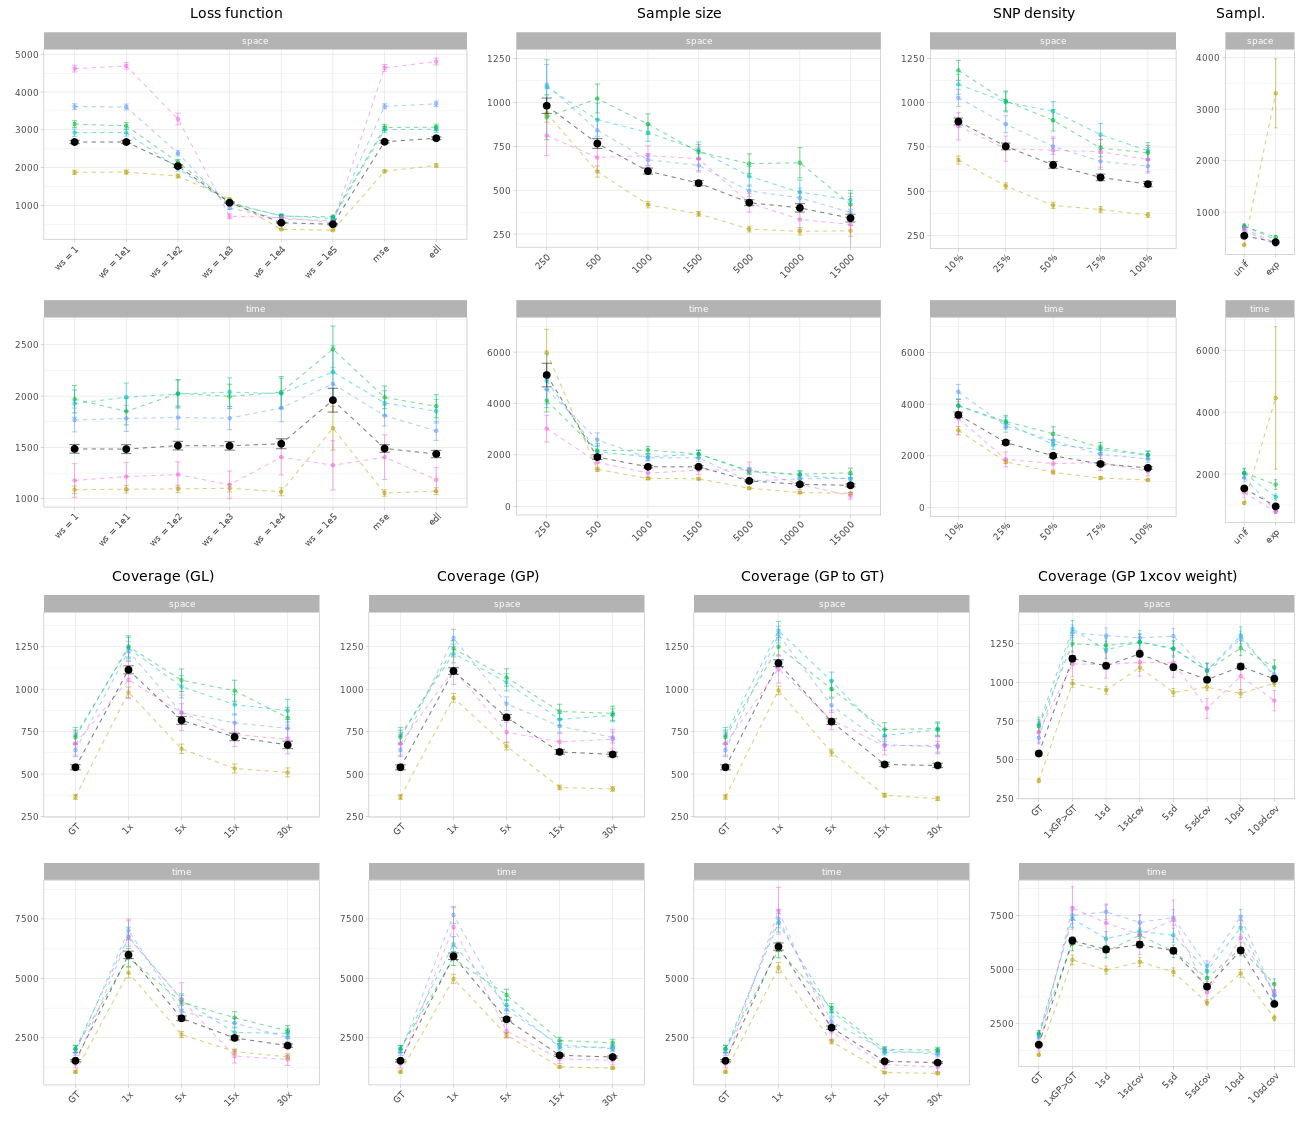

In [26]:
%%R -w 1300 -h 1125

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 8, 10)
labels      = c("1" = "ws = 1", "2" = "ws = 1e1", "3" = "ws = 1e2", "4" = "ws = 1e3", "5" = "ws = 1e4", "6" = "ws = 1e5", 
                "8" = "mse", "10" = "edl")
limits      = c("1", "2", "3", "4", "5", "6", "8", "10")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Loss function", "", "") -> p1
    
filter_pop  = c()
exp_to_plot = c(12, 13, 14, 5, 15, 16, 17)
labels      = c("12" = 15000, "13" = 10000, "14" = 5000, "5" = 1500, "15" =  1000, "16" =   500, "17" =  250)
limits      = c("17", "16", "15", "5", "14", "13", "12")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", c(225, 1250), c(0, 7000)) -> p2

filter_pop  = c()
exp_to_plot = c(5, 18)
labels      = c("5" = "unif", "18" = "exp")
limits      = c("5", "18")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sampl.", "", "") -> p3

filter_pop  = c()
exp_to_plot = c(5, 19, 20, 21, 22)
labels      = c("5" = "100%", "19" = "75%", "20" = "50%", "21" = "25%", "22" = "10%")
limits      = c("22", "21", "20", "19", "5")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "SNP density", "", "", c(225, 1250), c(0, 7000)) -> p4

filter_pop  = c()
exp_to_plot = c(5, 23, 24)
labels      = c("5" = "sNNt", "23" = "space", "24" = "time")
limits      = c()
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Predict.", "", "") -> p5

filter_pop  = c()
exp_to_plot = c(5, 25, 26, 27)
labels      = c("5" = "64", "25" = "128", "26" = "256", "27" = "512")
limits      = c("5", "25", "26", "27")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº nodes", "", "") -> p6

#----------------------------------------------------------------------------

filter_pop  = c()
exp_to_plot = c(5, 28, 29, 30, 31)
labels      = c("5" = "GT", "28" = "1x", "29" = "5x", "30" = "15x", "31" = "30x", "32" = "30x Norm1")
limits      = c("5", "28", "29", "30", "31")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL)", "", "", c(300, 1400), c(900, 8750)) -> p7

filter_pop  = c()
exp_to_plot = c(5, 33, 34, 35, 36)
labels      = c("5" = "GT", "33" = "1x", "34" = "5x", "35" = "15x", "36" = "30x", "37" = "30x Norm1")
limits      = c("5", "33", "34", "35", "36")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL mix)", "", "") -> p8

filter_pop  = c()
exp_to_plot = c(5, 38, 39, 40, 41)
labels      = c("5" = "GT", "38" = "1x", "39" = "5x", "40" = "15x", "41" = "30x", "42" = "30x Norm1")
limits      = c("5", "38", "39", "40", "41")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP)", "", "", c(300, 1400), c(900, 8750)) -> p9

filter_pop  = c()
exp_to_plot = c(5, 43, 44, 45, 46)
labels      = c("5" = "GT", "43" = "1x", "44" = "5x", "45" = "15x", "46" = "30x", "47" = "30x Norm1")
limits      = c("5", "43", "44", "45", "46")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP mix)", "", "") -> p10

filter_pop  = c()
exp_to_plot = c(5, 48, 49, 50, 51)
labels      = c("5" = "GT", "48" = "1x", "49" = "5x", "50" = "15x", "51" = "30x", "52" = "30x Norm1")
limits      = c("5", "48", "49", "50", "51")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP to GT)", "", "", c(300, 1400), c(900, 8750)) -> p11

filter_pop  = c()
exp_to_plot = c(5, 48, 38, 52, 53, 54, 55, 56)
labels      = c("5" = "GT", "48" = "1xGP>GT", "38" = "1sd", "52" = "1sdcov", "53" = "5sd", "54" = "5sdcov", "55" = "10sd", "56" = "10sdcov")
limits      = c("5", "48", "38", "52", "53", "54", "55", "56")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 1xcov weight)", "", "", c(300, 1400), c(900, 8750)) -> p12

filter_pop  = c()
exp_to_plot = c(5, 49, 39, 57, 58, 59, 60, 61)
labels      = c("5" = "GT", "49" = "1xGP>GT", "39" = "1sd", "57" = "1sdcov", "58" = "5sd", "59" = "5sdcov", "60" = "10sd", "61" = "10sdcov")
limits      = c("5", "49", "39", "57", "58", "59", "60", "61")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 5xcov weight)", "", "") -> p13



plot_grid(
    plot_grid(p1, p2, p4, p3, nrow = 1, rel_widths = c(8, 7, 5, 2)),
    plot_grid(p7, p9, p11, p12, nrow = 1),
    ncol = 1
) -> plot

plot

ggsave("error_with_pop.pdf", width = 36, height = 26, units = "cm")

plot 

In [19]:
(1/3)*40

13.333333333333332

In [ ]:
%%R -w 1300 -h 1125

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 8, 10)
labels      = c("1" = "ws = 1", "2" = "ws = 1e1", "3" = "ws = 1e2", "4" = "ws = 1e3", "5" = "ws = 1e4", "6" = "ws = 1e5", 
                "8" = "mse", "10" = "edl")
limits      = c("1", "2", "3", "4", "5", "6", "8", "10")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Loss function", "", "", TRUE) -> p1
    
filter_pop  = c()
exp_to_plot = c(12, 13, 14, 5, 15, 16, 17)
labels      = c("12" = 15000, "13" = 10000, "14" = 5000, "5" = 1500, "15" =  1000, "16" =   500, "17" =  250)
limits      = c("17", "16", "15", "5", "14", "13", "12")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", TRUE) -> p2

filter_pop  = c()
exp_to_plot = c(5, 18)
labels      = c("5" = "unif", "18" = "exp")
limits      = c("5", "18")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sampl.", "", "", TRUE) -> p3

filter_pop  = c()
exp_to_plot = c(5, 19, 20, 21, 22)
labels      = c("5" = "100%", "19" = "75%", "20" = "50%", "21" = "25%", "22" = "10%")
limits      = c("22", "21", "20", "19", "5")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "SNP density", "", "", TRUE) -> p4

filter_pop  = c()
exp_to_plot = c(5, 23, 24)
labels      = c("5" = "sNNt", "23" = "space", "24" = "time")
limits      = c()
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Predict.", "", "", TRUE) -> p5

filter_pop  = c()
exp_to_plot = c(5, 25, 26, 27)
labels      = c("5" = "64", "25" = "128", "26" = "256", "27" = "512")
limits      = c("5", "25", "26", "27")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº nodes", "", "") -> p6

#----------------------------------------------------------------------------

filter_pop  = c()
exp_to_plot = c(5, 28, 29, 30, 31)
labels      = c("5" = "GT", "28" = "1x", "29" = "5x", "30" = "15x", "31" = "30x", "32" = "30x Norm1")
limits      = c("5", "28", "29", "30", "31")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL)", "", "", TRUE) -> p7

filter_pop  = c()
exp_to_plot = c(5, 33, 34, 35, 36)
labels      = c("5" = "GT", "33" = "1x", "34" = "5x", "35" = "15x", "36" = "30x", "37" = "30x Norm1")
limits      = c("5", "33", "34", "35", "36")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL mix)", "", "", TRUE) -> p8

filter_pop  = c()
exp_to_plot = c(5, 38, 39, 40, 41)
labels      = c("5" = "GT", "38" = "1x", "39" = "5x", "40" = "15x", "41" = "30x", "42" = "30x Norm1")
limits      = c("5", "38", "39", "40", "41")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP)", "", "", TRUE) -> p9

filter_pop  = c()
exp_to_plot = c(5, 43, 44, 45, 46)
labels      = c("5" = "GT", "43" = "1x", "44" = "5x", "45" = "15x", "46" = "30x", "47" = "30x Norm1")
limits      = c("5", "43", "44", "45", "46")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP mix)", "", "", TRUE) -> p10

filter_pop  = c()
exp_to_plot = c(5, 48, 49, 50, 51)
labels      = c("5" = "GT", "48" = "1x", "49" = "5x", "50" = "15x", "51" = "30x", "52" = "30x Norm1")
limits      = c("5", "48", "49", "50", "51")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP to GT)", "", "", TRUE) -> p11

filter_pop  = c()
exp_to_plot = c(5, 49, 39, 52, 54, 53)
labels      = c("5" = "GT", "49" = "5xGP>GT", "39" = "5x1sd", "52" = "5x1sdcov", "54" = "5x5sd", "53" = "5x5sdcov")
limits      = c("5", "49", "39", "52", "54", "53")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 5xcov weight)", "", "", TRUE) -> p12

filter_pop  = c()
exp_to_plot = c(5, 48, 38, 55, 56, 57)
labels      = c("5" = "GT", "48" = "1xGP>GT", "38" = "1x1sd", "55" = "1x1sdcov", "56" = "1x5sd", "57" = "1x5sdcov")
limits      = c("5", "48", "38", "55", "56", "57")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 1xcov weight)", "", "", TRUE) -> p13

plot_grid(
    plot_grid(p1, p2, p3, p4, p5, p6, nrow = 1, rel_widths = c(8, 7, 2, 5, 2, 3)),
    plot_grid(p7, p8, p9, p10, p11, nrow = 1),
    plot_grid(p12, p13, nrow = 1),
    ncol = 1
) -> plot

plot

ggsave("error_with_pop.pdf", width = 55, height = 40, units = "cm")

plot

R[write to console]: Error in if (all(is.finite(continuous_range_coord)) && diff(continuous_range_coord) <  : 
  missing value where TRUE/FALSE needed

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 10 row(s) containing missing values (geom_path). 

R[write to console]: 2: Removed 10 rows containing missing values (geom_point). 

R[write to console]: 3: Removed 2 row(s) containing missing values (geom_path). 

R[write to console]: 4: Removed 2 rows containing missing values (geom_point). 

R[write to console]: 5: Removed 10 row(s) containing missing values (geom_path). 

R[write to console]: 6: Removed 10 rows containing missing values (geom_point). 

R[write to console]: 7: Removed 2 row(s) containing missing values (geom_path). 

R[write to console]: 8: Removed 2 rows containing missing values (geom_point). 




Error in if (all(is.finite(continuous_range_coord)) && diff(continuous_range_coord) <  : 
  missing value where TRUE/FALSE needed


RInterpreterError: Failed to parse and evaluate line '\nfilter_pop  = c()\nexp_to_plot = c(1, 2, 3, 4, 5, 6, 8, 10)\nlabels      = c("1" = "ws = 1", "2" = "ws = 1e1", "3" = "ws = 1e2", "4" = "ws = 1e3", "5" = "ws = 1e4", "6" = "ws = 1e5", \n                "8" = "mse", "10" = "edl")\nlimits      = c("1", "2", "3", "4", "5", "6", "8", "10")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Loss function", "", "", TRUE) -> p1\n    \nfilter_pop  = c()\nexp_to_plot = c(12, 13, 14, 5, 15, 16, 17)\nlabels      = c("12" = 15000, "13" = 10000, "14" = 5000, "5" = 1500, "15" =  1000, "16" =   500, "17" =  250)\nlimits      = c("17", "16", "15", "5", "14", "13", "12")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", TRUE) -> p2\n\nfilter_pop  = c()\nexp_to_plot = c(5, 18)\nlabels      = c("5" = "unif", "18" = "exp")\nlimits      = c("5", "18")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sampl.", "", "", TRUE) -> p3\n\nfilter_pop  = c()\nexp_to_plot = c(5, 19, 20, 21, 22)\nlabels      = c("5" = "100%", "19" = "75%", "20" = "50%", "21" = "25%", "22" = "10%")\nlimits      = c("22", "21", "20", "19", "5")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "SNP density", "", "", TRUE) -> p4\n\nfilter_pop  = c()\nexp_to_plot = c(5, 23, 24)\nlabels      = c("5" = "sNNt", "23" = "space", "24" = "time")\nlimits      = c()\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Predict.", "", "", TRUE) -> p5\n\nfilter_pop  = c()\nexp_to_plot = c(5, 25, 26, 27)\nlabels      = c("5" = "64", "25" = "128", "26" = "256", "27" = "512")\nlimits      = c("5", "25", "26", "27")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº nodes", "", "") -> p6\n\n#----------------------------------------------------------------------------\n\nfilter_pop  = c()\nexp_to_plot = c(5, 28, 29, 30, 31)\nlabels      = c("5" = "GT", "28" = "1x", "29" = "5x", "30" = "15x", "31" = "30x", "32" = "30x Norm1")\nlimits      = c("5", "28", "29", "30", "31")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL)", "", "", TRUE) -> p7\n\nfilter_pop  = c()\nexp_to_plot = c(5, 33, 34, 35, 36)\nlabels      = c("5" = "GT", "33" = "1x", "34" = "5x", "35" = "15x", "36" = "30x", "37" = "30x Norm1")\nlimits      = c("5", "33", "34", "35", "36")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL mix)", "", "", TRUE) -> p8\n\nfilter_pop  = c()\nexp_to_plot = c(5, 38, 39, 40, 41)\nlabels      = c("5" = "GT", "38" = "1x", "39" = "5x", "40" = "15x", "41" = "30x", "42" = "30x Norm1")\nlimits      = c("5", "38", "39", "40", "41")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP)", "", "", TRUE) -> p9\n\nfilter_pop  = c()\nexp_to_plot = c(5, 43, 44, 45, 46)\nlabels      = c("5" = "GT", "43" = "1x", "44" = "5x", "45" = "15x", "46" = "30x", "47" = "30x Norm1")\nlimits      = c("5", "43", "44", "45", "46")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP mix)", "", "", TRUE) -> p10\n\nfilter_pop  = c()\nexp_to_plot = c(5, 48, 49, 50, 51)\nlabels      = c("5" = "GT", "48" = "1x", "49" = "5x", "50" = "15x", "51" = "30x", "52" = "30x Norm1")\nlimits      = c("5", "48", "49", "50", "51")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP to GT)", "", "", TRUE) -> p11\n\nfilter_pop  = c()\nexp_to_plot = c(5, 49, 39, 52, 54, 53)\nlabels      = c("5" = "GT", "49" = "5xGP>GT", "39" = "5x1sd", "52" = "5x1sdcov", "54" = "5x5sd", "53" = "5x5sdcov")\nlimits      = c("5", "49", "39", "52", "54", "53")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 5xcov weight)", "", "", TRUE) -> p12\n\nfilter_pop  = c()\nexp_to_plot = c(5, 48, 38, 55, 56, 57)\nlabels      = c("5" = "GT", "48" = "1xGP>GT", "38" = "1x1sd", "55" = "1x1sdcov", "56" = "1x5sd", "57" = "1x5sdcov")\nlimits      = c("5", "48", "38", "55", "56", "57")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 1xcov weight)", "", "", TRUE) -> p13\n\nplot_grid(\n    plot_grid(p1, p2, p3, p4, p5, p6, nrow = 1, rel_widths = c(8, 7, 2, 5, 2, 3)),\n    plot_grid(p7, p8, p9, p10, p11, nrow = 1),\n    plot_grid(p12, p13, nrow = 1),\n    ncol = 1\n) -> plot\n\nplot\n\nggsave("error_with_pop.pdf", width = 55, height = 40, units = "cm")\n\nplot\n'.
R error message: 'Error in if (all(is.finite(continuous_range_coord)) && diff(continuous_range_coord) <  : \n  missing value where TRUE/FALSE needed'

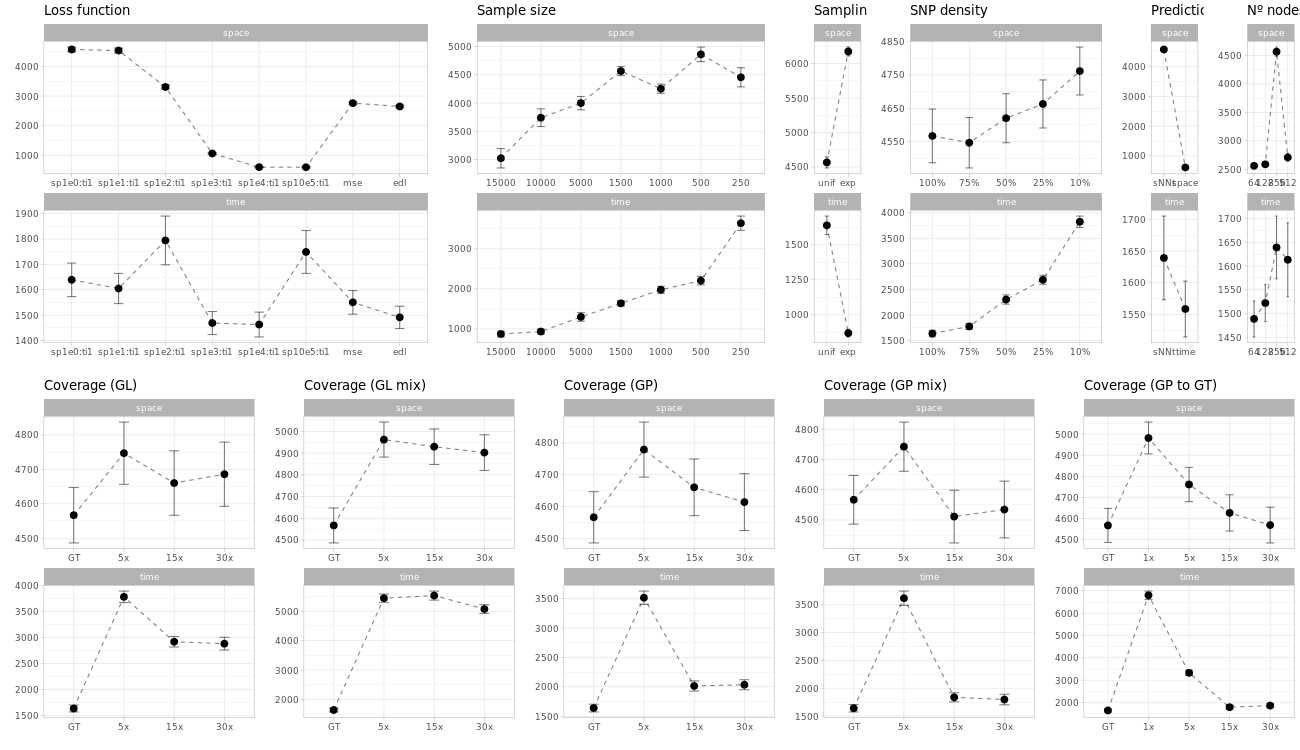

In [31]:
%%R -w 1300 -h 750

filter_pop  = c()
exp_to_plot = c(4, 34, 35, 36, 39, 40, 37, 38)
labels      = c("4" = "sp1e0:ti1", "34" = "sp1e1:ti1", "35" = "sp1e2:ti1", "36" = "sp1e3:ti1", "39" = "sp1e4:ti1", "40" = "sp10e5:ti1", "37" = "mse",  "38" = "edl")
limits      = c("4", "34", "35", "36", "39", "40", "37", "38")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Loss function", "", "", TRUE) -> p1
    
filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 7)
labels      = c("1" = 15000, "2" = 10000, "3" = 5000, "4" = 1500, "5" =  1000, "6" =   500, "7" =  250)
limits      = c("1", "2", "3", "4", "5", "6", "7")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", TRUE) -> p2

filter_pop  = c()
exp_to_plot = c(4, 8)
labels      = c("4" = "unif", "8" = "exp")
limits      = c("4", "8")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sampling", "", "", TRUE) -> p3

filter_pop  = c()
exp_to_plot = c(4, 9, 10, 11, 12)
labels      = c("4" = "100%", "9" = "75%", "10" = "50%", "11" = "25%", "12" = "10%")
limits      = c("4", "9", "10", "11", "12")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "SNP density", "", "", TRUE) -> p4

filter_pop  = c()
exp_to_plot = c(4, 13, 14)
labels      = c("4" = "sNNt", "13" = "space", "14" = "time")
limits      = c()
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Prediction", "", "", TRUE) -> p5

filter_pop  = c()
exp_to_plot = c(4, 15, 16, 17)
labels      = c("4" = "GT", "15" = "5x", "16" = "15x", "17" = "30x")
limits      = c("4", "15", "16", "17")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL mix)", "", "", TRUE) -> p6

filter_pop  = c()
exp_to_plot = c(4, 21, 22, 23)
labels      = c("4" = "GT", "21" = "5x", "22" = "15x", "23" = "30x")
limits      = c("4", "21", "22", "23")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL)", "", "", TRUE) -> p7

filter_pop  = c()
exp_to_plot = c(4, 24, 25, 26)
labels      = c("4" = "GT", "24" = "5x", "25" = "15x", "26" = "30x")
limits      = c("4", "24", "25", "26")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits,  "Coverage (GP)", "", "", TRUE) -> p8

filter_pop  = c()
exp_to_plot = c(4, 27, 28, 29)
labels      = c("4" = "GT", "27" = "5x", "28" = "15x", "29" = "30x")
limits      = c("4", "27", "28", "29")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP mix)", "", "", TRUE) -> p9

filter_pop  = c()
exp_to_plot = c(4, 30, 31, 32, 33)
labels      = c("4" = "GT", "30" = "1x", "31" = "5x", "32" = "15x", "33" = "30x")
limits      = c("4", "30", "31", "32", "33")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP to GT)", "", "", TRUE) -> p10

filter_pop  = c()
exp_to_plot = c(18, 19, 4, 20)
labels      = c("18" = "64", "19" = "128", "4" = "256", "20" = "512")
limits      = c("18", "19", "4", "20")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº nodes per hidden layer (10)", "", "") -> p11

plot_grid(
    plot_grid(p1, p2, p3, p4, p5, p11, nrow = 1, rel_widths = c(9, 7, 2, 5, 2, 2)),
    plot_grid(p7, p6, p8, p9, p10, nrow = 1),
    nrow = 2
)

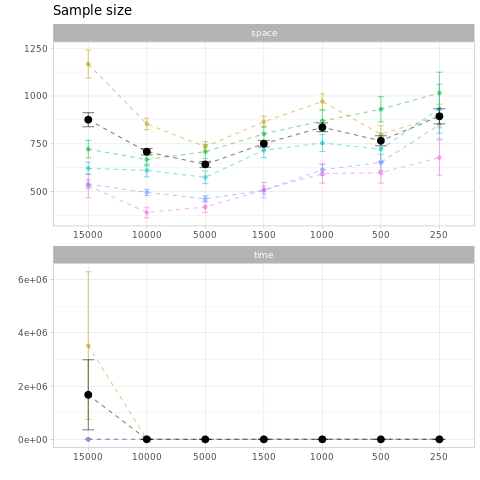

In [15]:
%%R

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 7)
labels      = c("1" = 15000, "2" = 10000, "3" = 5000, "4" = 1500, "5" =  1000, "6" =   500, "7" =  250)
limits      = c("1", "2", "3", "4", "5", "6", "7")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", TRUE) -> p1

p1

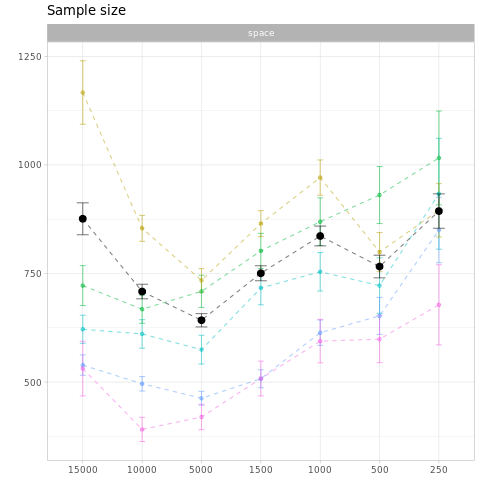

In [16]:
%%R

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 7)
labels      = c("1" = 15000, "2" = 10000, "3" = 5000, "4" = 1500, "5" =  1000, "6" =   500, "7" =  250)
limits      = c("1", "2", "3", "4", "5", "6", "7")
plot_errors(all_scenarios_per_pop %>% filter(stat == "space"), all_scenarios_all %>% filter(stat == "space"), 
            filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", TRUE) +
    theme(axis.title.x=element_blank())-> p1a

p1a

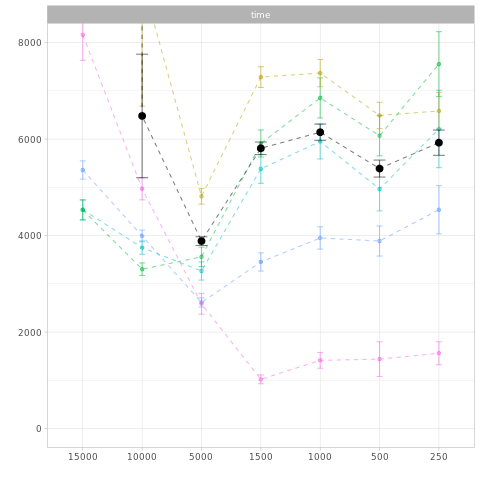

In [17]:
%%R

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 7)
labels      = c("1" = 15000, "2" = 10000, "3" = 5000, "4" = 1500, "5" =  1000, "6" =   500, "7" =  250)
limits      = c("1", "2", "3", "4", "5", "6", "7")
plot_errors(all_scenarios_per_pop %>% filter(stat == "time"), all_scenarios_all %>% filter(stat == "time"), 
            filter_pop, exp_to_plot, labels, limits, "", "", "", TRUE) + coord_cartesian(ylim = c(0, 8e3)) +
    theme(plot.title = element_blank())-> p1b

p1b

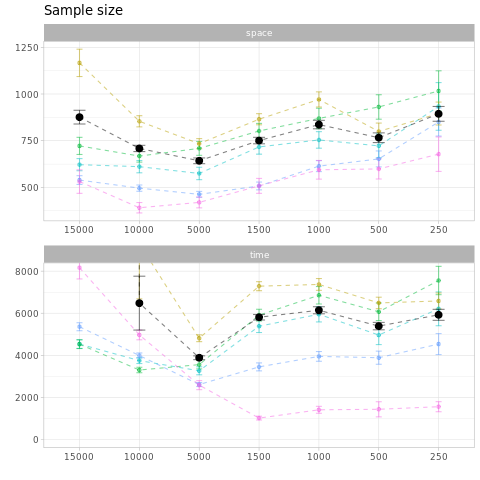

In [18]:
%%R

plot_grid(p1a, p1b, nrow = 2) -> p1
p1

In [19]:
%%R

filter_pop  = c()
exp_to_plot = c(4, 8)
labels      = c("4" = "unif", "8" = "exp")
limits      = c("4", "8")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sampling", "", "", TRUE) -> p2

filter_pop  = c()
exp_to_plot = c(4, 9, 10, 11, 12)
labels      = c("4" = "100%", "9" = "75%", "10" = "50%", "11" = "25%", "12" = "10%")
limits      = c("4", "9", "10", "11", "12")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "SNP density", "", "", TRUE) -> p3

filter_pop  = c()
exp_to_plot = c(4, 13, 14)
labels      = c("4" = "sNNt", "13" = "space", "14" = "time")
limits      = c()
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Prediction", "", "", TRUE) -> p4

filter_pop  = c()
exp_to_plot = c(4, 15, 16, 17)
labels      = c("4" = "GT", "15" = "5x", "16" = "15x", "17" = "30x")
limits      = c("4", "15", "16", "17")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL mix)", "", "", TRUE) -> p5

filter_pop  = c()
exp_to_plot = c(4, 21, 22, 23)
labels      = c("4" = "GT", "21" = "5x", "22" = "15x", "23" = "30x")
limits      = c("4", "21", "22", "23")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL)", "", "", TRUE) -> p6

filter_pop  = c()
exp_to_plot = c(4, 24, 25, 26)
labels      = c("4" = "GT", "24" = "5x", "25" = "15x", "26" = "30x")
limits      = c("4", "24", "25", "26")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits,  "Coverage (GP)", "", "", TRUE) -> p7

filter_pop  = c()
exp_to_plot = c(4, 27, 28, 29)
labels      = c("4" = "GT", "27" = "5x", "28" = "15x", "29" = "30x")
limits      = c("4", "27", "28", "29")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP mix)", "", "", TRUE) -> p8

filter_pop  = c()
exp_to_plot = c(4, 30, 31, 32, 33)
labels      = c("4" = "GT", "30" = "1x", "31" = "5x", "32" = "15x", "33" = "30x")
limits      = c("4", "30", "31", "32", "33")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP to GT)", "", "", TRUE) -> p9

filter_pop  = c()
exp_to_plot = c(18, 19, 4, 20)
labels      = c("18" = "64", "19" = "128", "4" = "256", "20" = "512")
limits      = c("18", "19", "4", "20")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº nodes per hidden layer (10)", "", "") -> p10

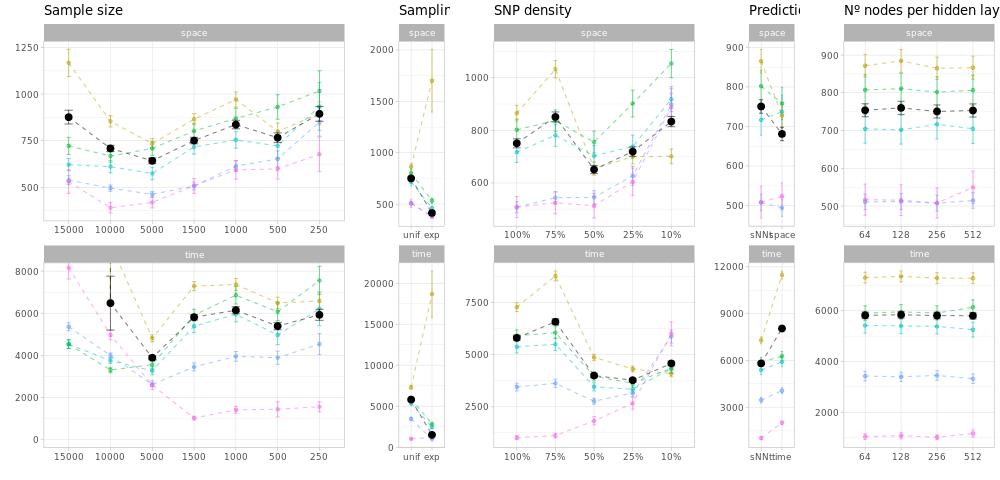

In [28]:
%%R -w 1000

plot_grid(p1, p2, p3, p4, p10, nrow = 1, rel_widths = c(7, 2, 5, 2, 4))

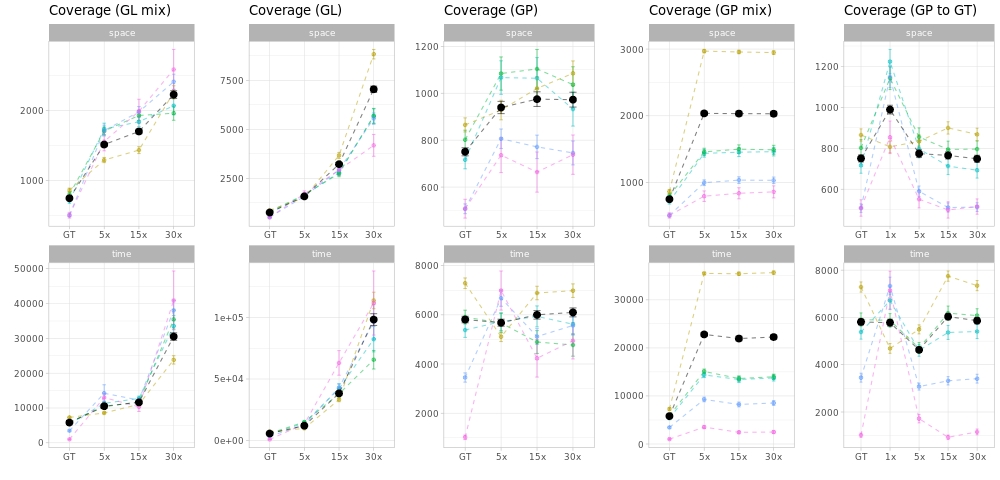

In [29]:
%%R -w 1000

plot_grid(p5, p6, p7, p8, p9, nrow = 1, rel_widths = c(4, 4, 4, 4, 4))

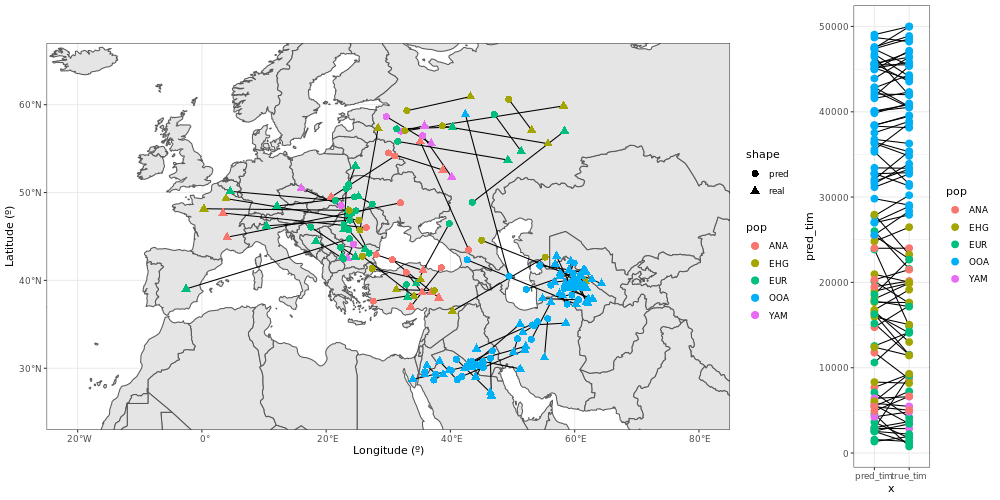

In [24]:
%%R -w 1000 -h 500

exp = "41"
sim = "europe"

set.seed(1234)

plot_grid(
read.table(paste("../../sandbox/", sim, "/", exp, "/pred.txt", sep = ""), header = T) %>%
    left_join(read.table(paste("../../data/", sim, "/metadata.txt", sep = ""), header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>%
    filter(gro < 31) %>%
    #sample_n(100, replace = FALSE) %>%
    ggplot() +
    geom_sf(data = ne_countries(scale = "medium", returnclass = "sf")) +
    geom_segment(aes(x = pred_lon, xend = true_lon, y = pred_lat, yend = true_lat)) +
    geom_point(aes(x = true_lon, y = true_lat, color = pop, shape = "real"),  size = 3) +
    geom_point(aes(x = pred_lon, y = pred_lat, color = pop, shape = "pred"),  size = 3) +
    coord_sf(ylim = c(25, 65), xlim = c(-20, 80)) +
    xlab("Longitude (º)") +
    ylab("Latitude (º)") +
    theme_bw(),
read.table(paste("../../sandbox/", sim, "/", exp, "/pred.txt", sep = ""), header = T) %>%
    left_join(read.table(paste("../../data/", sim, "/metadata.txt", sep = ""), header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>%
    filter(gro < 31) %>%
    select(sim, exp, nam, typ, gro, ind, pop, idx, snp, true_tim, pred_tim) %>%
    gather("truepred", "value", c(true_tim, pred_tim)) %>% 
    ggplot() +
    geom_segment(data = . %>% spread(truepred, value), aes(x = "pred_tim", xend = "true_tim", y = pred_tim, yend = true_tim)) +
    geom_point(aes(x = truepred, y = value, color = pop), size = 3) +
    theme_bw(),
              nrow = 1, rel_widths = c(4, 1))
    

In [13]:
%%R

read.table(paste("../../sandbox/", sim, "/", exp, "/pred.txt", sep = ""), header = T) %>%
    left_join(read.table(paste("../../data/", sim, "/metadata.txt", sep = ""), header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>%
    filter(gro < 31) %>%
    filter(diff_space > 1500) %>%
    head()

     sim exp nam typ gro   ind idx  snp      run   true_lat true_lon pred_lat
1 europe  41  gp  gp   0 37861 118 4032 1.409381  3.3979725 47.66662 22.23037
2 europe  41  gp  gp   2 45376 843 4032 2.410663 -2.5453950 39.03479 16.30318
3 europe  41  gp  gp   4 38456 257 4032 2.410050 35.4420215 38.59874 18.66624
4 europe  41  gp  gp   9 39916 149 4032 2.401484 49.2496086 53.70052 32.95612
5 europe  41  gp  gp  17 29313 668 4032 2.411526  0.3236811 48.15421 13.95089
6 europe  41  gp  gp  20 38966 201 4032 1.409420 58.2178121 59.86223 40.54652
  pred_lon diff_space true_tim  pred_tim  diff_time pop
1 49.86197   2107.412     9250  6831.343  2418.6567 ANA
2 49.24141   2377.015      771  5248.341 -4477.3408 EUR
3 44.28307   1947.411     8681 13403.534 -4722.5342 ANA
4 54.93596   1814.643     7236  5006.234  2229.7656 EUR
5 49.40970   1521.564    17640 17300.020   339.9805 EHG
6 56.11810   1982.808     8189  8492.436  -303.4355 EHG


In [217]:
gm = np.array([[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]])
arc        = simGL.sim_allelereadcounts(gm = gm, mean_depth = cov, std_depth = 1, e = err, ploidy = 2, seed = 1234)
GL         = simGL.allelereadcounts_to_GL(arc = arc, e = err, ploidy = 2)[:, :, [0, 1, 4]]
likelihood = np.exp(-GL)
prior      = np.array([1/4, 1/2, 1/4])
GP         = likelihood*prior/(np.sum(likelihood*prior, axis = 2).reshape(GL.shape[:2] + (1,)))
print(GP)
GP.transpose((1, 0, 2)).reshape(-1).reshape(GP.shape[1], GP.shape[0]*3)

[[[4.49380428e-03 9.95427357e-01 7.88386717e-05]
  [6.58759124e-01 3.41038118e-01 2.02757502e-04]
  [1.15759227e-01 8.84205144e-01 3.56291864e-05]]

 [[6.23800015e-02 9.36525612e-01 1.09438599e-03]
  [1.55590114e-09 6.38266403e-02 9.36173358e-01]
  [8.28534135e-10 5.01477591e-01 4.98522408e-01]]]


array([[4.49380428e-03, 9.95427357e-01, 7.88386717e-05, 6.23800015e-02,
        9.36525612e-01, 1.09438599e-03],
       [6.58759124e-01, 3.41038118e-01, 2.02757502e-04, 1.55590114e-09,
        6.38266403e-02, 9.36173358e-01],
       [1.15759227e-01, 8.84205144e-01, 3.56291864e-05, 8.28534135e-10,
        5.01477591e-01, 4.98522408e-01]])

In [226]:
gm = np.array([[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]])
print("gm")
print(gm.shape)
print(gm)
arc      = simGL.sim_allelereadcounts(gm = gm, mean_depth = cov, std_depth = 1, e = err, ploidy = 2, seed = 1234)
print("arc")
print(arc)
GL       = simGL.allelereadcounts_to_GL(arc = arc, e = err, ploidy = 2)[:, :, [0, 1, 4]]
print("GL")
print(GL)

print(GL.transpose((1, 0, 2)).reshape(-1).reshape(GL.shape[1], GL.shape[0]*3).T)

gm
(2, 6)
[[1 0 0 0 1 0]
 [0 0 1 1 0 1]]
arc
[[[3 2 0 0]
  [2 0 0 0]
  [3 1 0 0]]

 [[2 1 0 0]
  [0 5 0 0]
  [1 6 0 1]]]
GL
[[[ 4.70732535  0.          8.75037661]
  [ 0.          1.35151088  8.08610254]
  [ 1.34002952  0.          9.42613205]]

 [[ 2.01578495  0.          6.05883622]
  [20.21525634  3.37877719  0.        ]
  [20.21525634  0.6872368   0.        ]]]
[[ 4.70732535  0.          1.34002952]
 [ 0.          1.35151088  0.        ]
 [ 8.75037661  8.08610254  9.42613205]
 [ 2.01578495 20.21525634 20.21525634]
 [ 0.          3.37877719  0.6872368 ]
 [ 6.05883622  0.          0.        ]]
